Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'male',
       'female', 'between\n18 and\n19 years', 'between\n20 and\n24 years',
       'between\n25 and\n29 years', 'between\n30 and\n34 years',
       'between\n35 and\n39 years', 'between\n40 and\n44 years',
       'between\n45 and\n49 years', 'between\n50 and\n59 years',
       'between\n60 and\n69 years', '70 years\nand over', 'Swiss',
       'Total foreigners', 'Foreigners with B, C, Ci permit',
       'Other foreigners', 'Foreigners of unknown status'],
      dtype='object')


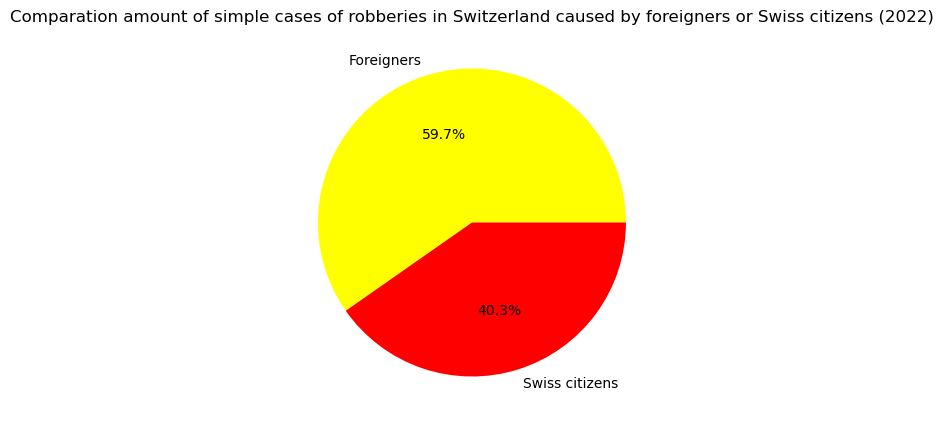

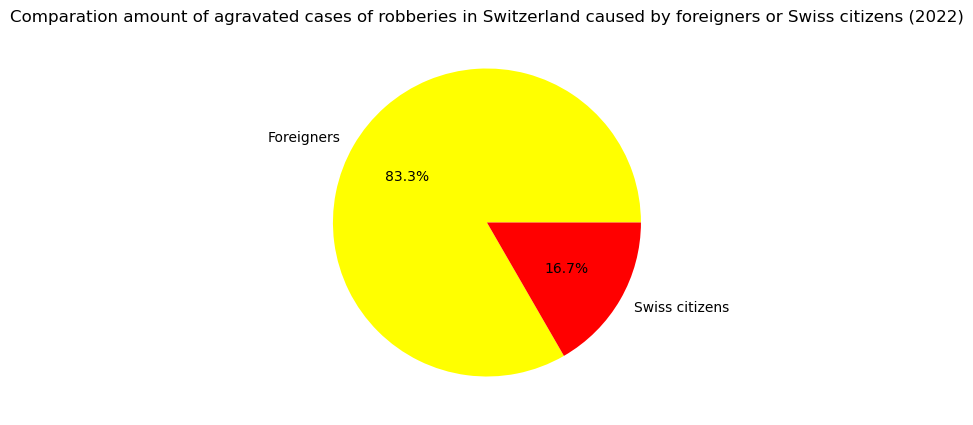

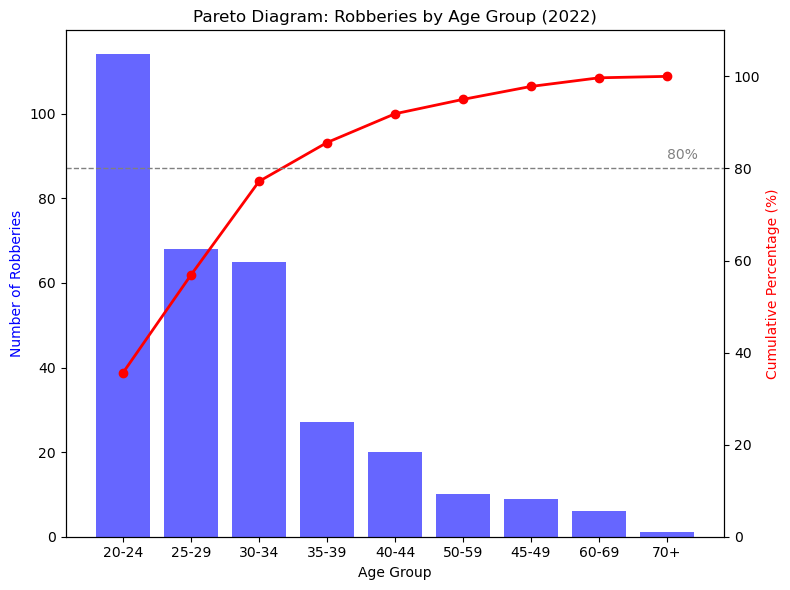

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
file_path = "C:/Users/aleja/Downloads/swiss_crime_2008_2022.xlsx"

sheet_name = "2022"
df = pd.read_excel(file_path, sheet_name= sheet_name,header=4, skipfooter=5)


#getting the row for simple violent robberires cases
simple_violent_robberies = df.iloc[13] 
#this is the total of simple robberies
total_simple_robberies = simple_violent_robberies["Unnamed: 2"] 

#enclosing the young groups to check if in fact they do most of the robberires with pareto
simple_robbers_20_to_24 = simple_violent_robberies["between\n20 and\n24 years"]
simple_robbers_25_to_29 = simple_violent_robberies["between\n25 and\n29 years"]
simple_robbers_30_to_34 = simple_violent_robberies["between\n30 and\n34 years"]

#as it will be in a pareto diagram, let's also take the other age ranges:
simple_robbers_35_to_39 = simple_violent_robberies["between\n35 and\n39 years"]
simple_robbers_40_to_44 = simple_violent_robberies["between\n40 and\n44 years"]
simple_robbers_45_to_49 = simple_violent_robberies["between\n45 and\n49 years"]
simple_robbers_50_to_59 = simple_violent_robberies["between\n50 and\n59 years"]
simple_robbers_60_to_69 = simple_violent_robberies["between\n60 and\n69 years"]
simple_robbers_70_and_over = simple_violent_robberies["70 years\nand over"]

print(df.columns)
young_simple_robbers = simple_robbers_20_to_24 + simple_robbers_25_to_29 + simple_robbers_30_to_34 #this is the sum for young robbers in simple cases



agravated_robberies = df.iloc[8]

total_agravated_robberies = agravated_robberies["Unnamed: 2"] #this is the total of agravated robberies

agravated_robbers_20_to_24 = agravated_robberies["between\n20 and\n24 years"] #enclosing again the young groups to check if in fact they do most of the robberires with pareto
agravated_robbers_25_to_29 = agravated_robberies["between\n25 and\n29 years"]
agravated_robbers_30_to_34 = agravated_robberies["between\n30 and\n34 years"]

#as it will be in a pareto diagram, let's also take the other age ranges:
agravated_robbers_35_to_39 = agravated_robberies["between\n35 and\n39 years"]
agravated_robbers_40_to_44 = agravated_robberies["between\n40 and\n44 years"]
agravated_robbers_45_to_49 = agravated_robberies["between\n45 and\n49 years"]
agravated_robbers_50_to_59 = agravated_robberies["between\n50 and\n59 years"]
agravated_robbers_60_to_69 = agravated_robberies["between\n60 and\n69 years"]
agravated_robbers_70_and_over = agravated_robberies["70 years\nand over"]

young_agravated_robbers = agravated_robbers_20_to_24 + agravated_robbers_25_to_29 + agravated_robbers_30_to_34


total_young_robbers = young_agravated_robbers + young_simple_robbers





simple_foreigners = simple_violent_robberies["Total foreigners"]
agravated_foreigners = agravated_robberies["Total foreigners"]

#now let's do some graphics: 
    #pie chart to see the foreigners / non foreigners proportion
    #pareto diagram to check the ages (as I suspect that the young robbers cause most of the robberies)

#piechart:
#introducing the data for simple robberies (foreigners):
values_simple_robberies_foreigners = [simple_foreigners, total_simple_robberies - simple_foreigners]
labels_simple_robberies_foreigners = ["Foreigners", "Swiss citizens"]

#now creating the chart:
plt.figure(figsize=(5,5))
plt.pie(values_simple_robberies_foreigners, labels=labels_simple_robberies_foreigners, autopct='%1.1f%%', colors=["yellow","red"])
plt.title("Comparation amount of simple cases of robberies in Switzerland caused by foreigners or Swiss citizens (2022)")
plt.show()

#now introducing the data for agravated robberies (foreigners):
values_agravated_robberies_foreigners = [agravated_foreigners, total_agravated_robberies -agravated_foreigners]
labels_agravated_robberies_foreigners = ["Foreigners","Swiss citizens"]

#Now creating the chart:
plt.figure(figsize=(5,5))
plt.pie(values_agravated_robberies_foreigners,labels=labels_agravated_robberies_foreigners, autopct='%1.1f%%', colors=["yellow","red"])
plt.title("Comparation amount of agravated cases of robberies in Switzerland caused by foreigners or Swiss citizens (2022)")
plt.show()

#now the pareto diagram:

# Creating a dictionary with robberies by age (both simple and agravated robberies) 
robberies_by_age = {
    "20-24": simple_robbers_20_to_24 + agravated_robbers_20_to_24,
    "25-29": simple_robbers_25_to_29 + agravated_robbers_25_to_29,
    "30-34": simple_robbers_30_to_34 + agravated_robbers_30_to_34,
    "35-39": simple_robbers_35_to_39 + agravated_robbers_35_to_39,
    "40-44": simple_robbers_40_to_44 + agravated_robbers_40_to_44,
    "45-49": simple_robbers_45_to_49 + agravated_robbers_45_to_49,
    "50-59": simple_robbers_50_to_59 + agravated_robbers_50_to_59,
    "60-69": simple_robbers_60_to_69 + agravated_robbers_60_to_69,
    "70+": simple_robbers_70_and_over + agravated_robbers_70_and_over
}


#PARETO:
# Converting to dataframe
df = pd.DataFrame(list(robberies_by_age.items()), columns=['Age Group', 'Robberies'])

# Sorting robberies
df = df.sort_values(by='Robberies', ascending=False)

# Calculating cumulative
df['Cumulative %'] = df['Robberies'].cumsum() / df['Robberies'].sum() * 100

# Pareto chart
fig, ax1 = plt.subplots(figsize=(8, 6))

# bar chart (robberies by age)
ax1.bar(df['Age Group'], df['Robberies'], color='blue', alpha=0.6, label='Robberies')
ax1.set_ylabel('Number of Robberies', color='blue')
ax1.set_xlabel('Age Group')

# Cumulative line
ax2 = ax1.twinx()
ax2.plot(df['Age Group'], df['Cumulative %'], color='red', marker='o', linestyle='-', linewidth=2, label='Cumulative %')
ax2.set_ylabel('Cumulative Percentage (%)', color='red')
ax2.set_ylim([0, 110])

# 80% line
ax2.axhline(80, color='gray', linestyle='dashed', linewidth=1)
ax2.text(len(df['Age Group'])-1, 82, '80%', color='gray')

# Title and design
plt.title('Pareto Diagram: Robberies by Age Group (2022)')
fig.tight_layout()


plt.show()


In [17]:
import pandas as pd
url = "https://www.bfs.admin.ch/bfs/en/home/statistics/population/migration-integration/international-migration.html"
df = pd.read_html(url)
print(df)

[                                                   0       1            2  \
0                                                NaN     NaN  Immigration   
1   Permanent* and non-permanent resident population  2019.0        241.4   
2   Permanent* and non-permanent resident population  2020.0        215.0   
3   Permanent* and non-permanent resident population  2021.0        231.1   
4   Permanent* and non-permanent resident population  2022.0        353.9   
5   Permanent* and non-permanent resident population  2023.0        314.2   
6                     Permanent resident population*  2019.0        145.1   
7                     Permanent resident population*  2020.0        138.8   
8                     Permanent resident population*  2021.0        144.9   
9                     Permanent resident population*  2022.0        167.1   
10                    Permanent resident population*  2023.0        175.5   
11                 Non-permanent resident population  2019.0         96.2  